# 1. 라이브러리 

In [1]:
from PIL import Image
import glob
import numpy as np
import os
import matplotlib.pyplot as plt


# 2. 데이터 수집 및 전처리

- 데이터 수집 
 - 자료실에 올라온 다른 교육생분들의 사진을 취합
 - 배경이 복잡하거나 단순한것 모두 취합
 - 훈련용 데이터 : 가위,바위, 보 각각 100장씩 총 300장 수집
 - 테스트용 데이터 : 가위,바위, 보 각각 100장씩 총 300장 수집
 
- 전처리 
 - 손글씨 이미지 처럼 28*28 이미지로 resize 해주기
 - 정규화 : 이미지 픽셀데이터의 값을 0 ~ 255에서 0 ~ 1사이값으로 변경
 


### 가위이미지 사이즈 변경

In [2]:
def resize_images(img_path):
    images = glob.glob(img_path + '/*.jpg')
    print(len(images), ' images to be resized.')
    
    target_size=(28,28)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, 'JPEG')
    
    print( len(images), " images resized.")
    
image_dir_path = os.getenv("HOME") + "/aiffel/project/exp01_digits_rps/dataset/train/scissor"
resize_images(image_dir_path)


100  images to be resized.
100  images resized.


### 바위 이미지 사이즈 변경

In [3]:
image_dir_path = os.getenv("HOME") + "/aiffel/project/exp01_digits_rps/dataset/train/rock"
resize_images(image_dir_path)


100  images to be resized.
100  images resized.


### 보자기 이미지 사이즈 변경

In [4]:
image_dir_path = os.getenv("HOME") + "/aiffel/project/exp01_digits_rps/dataset/train/paper"
resize_images(image_dir_path)


100  images to be resized.
100  images resized.


# 3. 데이터 로드

In [5]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.    
    
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1
	
    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/project/exp01_digits_rps/dataset/train"
(x_train, y_train)=load_data(image_dir_path)

# 입력 데이터(이미지 픽셀값)를 0~1 사이의 값으로 정규화
x_train_norm = x_train/255.0   

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


## 로드한 입출력 데이터 확인
- 입력 데이터 : 28*28 이미지
- 출력 데이터 : 가위 :0, 바위 : 1, 보:2

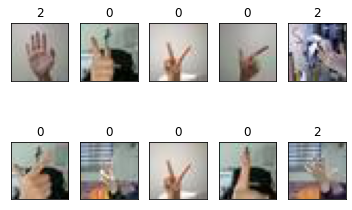

In [6]:
import random
for i in range(10):
    img_idx = random.randrange(300)
    title = y_train[img_idx]
    plt.subplot(2,5, i+1)
    plt.title(title)
    plt.xticks([])  # x = None 
    plt.yticks([])  # y = None
    plt.imshow(x_train[img_idx])
    

# 4. 모델 설계

- 손글쓰 분류 모델 그대로 적용(LeNet 딥러닝 모델)

- Conv2D 레이어
 - 첫번째 인자 : 이미지의 특징(가위바위보 이미지 분류시 16개, 32개의 특징을 고려하겠다는 의미, 복잡한 이미지의 경우 특징수를 늘리는것이 좋다)
 - 마지막 인자 : 입력 이미지 형태(가로, 세로, 채널수)
    ```
    model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224,224,1)))
    model.add(keras.layers.Conv2D(32, (3,3), activation='relu')) 
    ```
- Dense 레이어 
 - 첫번째 인자 : 분류기에 사용되는 뉴런의 수 (복잡한 분류가 필요한 경우 뉴런수를 늘리는 것이 좋다)
 - 마지막 Dense레이어의 경우 출력단에서 결과적으로 분류할 클래스 수로 지정해야한다.
```
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax')) #가위바위보 3가지 분류이므로 3으로 설정

 ```



In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2)) #MaxPooling2D 과 MaxPool2D 같은 함수임.
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (No

# 5. 모델 학습

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 3s 11ms/step - loss: 1.0986 - accuracy: 0.3400
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0799 - accuracy: 0.3667
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0566 - accuracy: 0.3933
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0319 - accuracy: 0.4733
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 1.0131 - accuracy: 0.4667
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.9378 - accuracy: 0.6100
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.8782 - accuracy: 0.6567
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 0.8162 - accuracy: 0.6833
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 0.7354 - accuracy: 0.7600
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.7062 - accuracy: 0.6733


In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_norm, y_train, epochs=20)

Epoch 1/20
10/10 [==============================] - 0s 3ms/step - loss: 0.6254 - accuracy: 0.8100
Epoch 2/20
10/10 [==============================] - 0s 3ms/step - loss: 0.5659 - accuracy: 0.7933
Epoch 3/20
10/10 [==============================] - 0s 3ms/step - loss: 0.5804 - accuracy: 0.7667
Epoch 4/20
10/10 [==============================] - 0s 3ms/step - loss: 0.5150 - accuracy: 0.8467
Epoch 5/20
10/10 [==============================] - 0s 3ms/step - loss: 0.5026 - accuracy: 0.8367
Epoch 6/20
10/10 [==============================] - 0s 3ms/step - loss: 0.4459 - accuracy: 0.8667
Epoch 7/20
10/10 [==============================] - 0s 3ms/step - loss: 0.4185 - accuracy: 0.8633
Epoch 8/20
10/10 [==============================] - 0s 3ms/step - loss: 0.4025 - accuracy: 0.8567
Epoch 9/20
10/10 [==============================] - 0s 3ms/step - loss: 0.4057 - accuracy: 0.8567
Epoch 10/20
10/10 [==============================] - 0s 3ms/step - loss: 0.3907 - accuracy: 0.8733
Epoch 11/20
10/10 [

**epoch 10회 진행시 67% 정확도였는데 하이퍼파라미터 변경없이 에폭횟수만 늘렸을 뿐인데 90% 까지 정확도가 향상되었다** 

테스트를 통해 이 모델이 효과가 있는지 확인해보자

# 6. 모델 테스트

### 테스트용 데이터 로드

In [10]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.

image_dir_path = os.getenv("HOME") + "/aiffel/project/exp01_digits_rps/dataset/test/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/project/exp01_digits_rps/dataset/test/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/project/exp01_digits_rps/dataset/test/paper"
resize_images(image_dir_path)

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.    
    
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1
	
    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트 데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/project/exp01_digits_rps/dataset/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
테스트 데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [11]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 [==============================] - 0s 2ms/step - loss: 138.9071 - accuracy: 0.6700
test_loss: 138.9070587158203 
test_accuracy: 0.6700000166893005


### 모델이 예측한 값 확인 - 예측이 틀린 경우 

훈련 정확도에 비해 테스트 정확도는 67%로 월등히 떨어지는 것이 확인되었다. 모델 개선이 필요한것 같다. 일단 예측이 틀린 경우를 몇가지 확인해보자

In [12]:
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

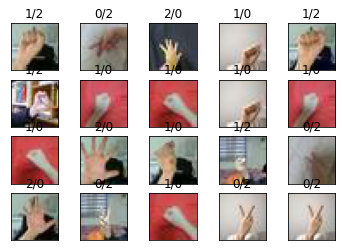

In [13]:
wrong_predict_list = []
for i, _ in enumerate(predicted_labels):
    if y_test[i] != predicted_labels[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 20개만 뽑아서 확인해보자
wrong_samples = random.choices(population=wrong_predict_list, k=20)

for i, wrong_idx in enumerate(wrong_samples):    
    #title : 실제값 / 틀린예측값 
    title = str(y_test[wrong_idx]) +'/'+ str(predicted_labels[wrong_idx])
    plt.subplot(4,5, i+1)
    plt.title(title)
    plt.xticks([])  # x = None 
    plt.yticks([])  # y = None
    plt.imshow(x_test[wrong_idx])
    

**가위바위보 배경이 복잡한 이미지의 경우만 예측에서 빗나가는 줄 알았는데 배경이 단순한 경우도 예측이 잘되지 않는 것으로 보아 모델이 이미지를 제대로 학습하지 못한것 같다. 테스트 셋과 훈련셋의 데이터는 참고로 비슷한 분포의 이미지로 구성하였다.**

모델을 개선하거나 모델 학습에 도움이 되는 방법을 찾아보았다.

![ML Strategy Angdrew Ag](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FrisDR%2FbtqLEN8XyK5%2FC6j6lyfyJI1vmn2mVdo1wK%2Fimg.png)


- Dasetset 변경 
 - 보다 많은 데이터 수집
 - 보다 다양한 데이터 수집

- 학습알고리즘 변경

- 하이퍼파라미터 튜닝 
 - 레이어의 수
 - 은닉노드의 수
 - 학습률
 - 활성화함수

- 정규화(Regularization)
- Dropout Regularization
- 데이터 증강(Data augmentation)
- 조기 종료(Early stopping)


**모델의 개선을 위해 시도할수 있는 방법들이 너무도 많은데 해당 방법을 아는 것 만큼이나 
잘못된 방법을 선택하지 않는것도 중요할 것 같다. 
프로젝트 기간에 맞게 가장 효율적이고 빠르게 개선할 수있도록 각 방법이 어떤 데이터와 문제에 적합한지 더 연구해볼 필요가 있겠다.**

# 7. 모델 개선



- 본프로젝트에서 시도해본 방법 
 1. 하이퍼파라미터 조정 
 2. 데이터 수집
  - 가위바위보 이미지 수 증가: 각 100 -> 300, 총 훈련 데이터수 300 -> 900개로 추가


In [45]:
# 각레이어의 파라미터를 조정하고 레이어를 추가해보았다
'''
이전 모델
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))  
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))
'''

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_norm, y_train, epochs=20)

print('\n', '-'*100, '\n')

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Epoch 1/20
10/10 [==============================] - 0s 5ms/step - loss: 1.1392 - accuracy: 0.4100
Epoch 2/20
10/10 [==============================] - 0s 5ms/step - loss: 0.9829 - accuracy: 0.5667
Epoch 3/20
10/10 [==============================] - 0s 4ms/step - loss: 0.7063 - accuracy: 0.7467
Epoch 4/20
10/10 [==============================] - 0s 4ms/step - loss: 0.4473 - accuracy: 0.8367
Epoch 5/20
10/10 [==============================] - 0s 4ms/step - loss: 0.3498 - accuracy: 0.8733
Epoch 6/20
10/10 [==============================] - 0s 4ms/step - loss: 0.1910 - accuracy: 0.9200
Epoch 7/20
10/10 [==============================] - 0s 4ms/step - loss: 0.1564 - accuracy: 0.9500
Epoch 8/20
10/10 [==============================] - 0s 4ms/step - loss: 0.0751 - accuracy: 0.9800
Epoch 9/20
10/10 [==============================] - 0s 5ms/step - loss: 0.0595 - accuracy: 0.9733
Epoch 10/20
10/10 [==============================] - 0s 4ms/step - loss: 0.0380 - accuracy: 0.9933
Epoch 11/20
10/10 [

**레이어를 변경하거나 파라미터를 조정해보았지만 크게 개선되지 않았다. 이미지 데이터를 더 추가하여 훈련시켜보자.**

In [47]:
#이미지 리사이즈
image_dir_path = os.getenv("HOME") + "/aiffel/project/exp01_digits_rps/dataset/train2/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/project/exp01_digits_rps/dataset/train2/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/project/exp01_digits_rps/dataset/train2/paper"
resize_images(image_dir_path)


300  images to be resized.
300  images resized.
300  images to be resized.
300  images resized.
300  images to be resized.
300  images resized.


In [49]:
image_dir_path = os.getenv("HOME") + "/aiffel/project/exp01_digits_rps/dataset/train2"
(x_train, y_train)=load_data(image_dir_path, 900)

# 입력 데이터(이미지 픽셀값)를 0~1 사이의 값으로 정규화
x_train_norm = x_train/255.0   

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

테스트 데이터(x_train)의 이미지 개수는 900 입니다.
x_train shape: (900, 28, 28, 3)
y_train shape: (900,)


In [50]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2)) #MaxPooling2D 과 MaxPool2D 같은 함수임.
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_norm, y_train, epochs=20)

print('\n', '-'*100, '\n')

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Epoch 1/20
29/29 [==============================] - 0s 6ms/step - loss: 1.1006 - accuracy: 0.3600
Epoch 2/20
29/29 [==============================] - 0s 3ms/step - loss: 1.0449 - accuracy: 0.4489
Epoch 3/20
29/29 [==============================] - 0s 3ms/step - loss: 0.9336 - accuracy: 0.5856
Epoch 4/20
29/29 [==============================] - 0s 3ms/step - loss: 0.7829 - accuracy: 0.6589
Epoch 5/20
29/29 [==============================] - 0s 3ms/step - loss: 0.6761 - accuracy: 0.7244
Epoch 6/20
29/29 [==============================] - 0s 3ms/step - loss: 0.5728 - accuracy: 0.7922
Epoch 7/20
29/29 [==============================] - 0s 3ms/step - loss: 0.4843 - accuracy: 0.8356
Epoch 8/20
29/29 [==============================] - 0s 3ms/step - loss: 0.4079 - accuracy: 0.8600
Epoch 9/20
29/29 [==============================] - 0s 3ms/step - loss: 0.3200 - accuracy: 0.9211
Epoch 10/20
29/29 [==============================] - 0s 4ms/step - loss: 0.2737 - accuracy: 0.9333
Epoch 11/20
29/29 [

### 하이퍼파라미터 튜닝으로 헛되이 보낸시간이 아쉬우리만큼 테스트 성능이 좋게나왔다. 

# 8. 정리

가위바위보 세가지 이미지에 대한 분류문제를 CNN 모델로 풀어보았다. 손글씨 이미지에 비해서 가위바위보의 경우 이미지 특징이 복잡해(사진을 찍은 사람마다 다른 배경, 손의 여러가지 각도 모양등) 이전 손글씨와 같은 CNN 모델로 학습도 잘되지 않을것 같았는데 학습률이 100%가까이 나오는것이 신기했다. 하지만 테스트에서 여실히 걱정했던 부분이 성능으로 나타났다. 이번과제를 통해 중요하게 느낀점은 다음과 같다.

1. **데이터셋의 중요성**

데이터셋을 추가로 수집하는것이 번거롭고 어려운 작업이 될것 같아 파라미터 튜닝을 해보는것 우선해보았는데 결과적으로는 시간을 허비한 셈이 되었다. 모델의 테스트 결과가 좋지 않을때 가장 우선 고려해야할 점은 다양하고 많은 데이터셋 확보인 점을 알게되었다. 

2. **좋은 모델을 만들기 위한 방법**

좋은 모델을 만들기 위한 방법에 대해 막연하게나마 정리할 기회를 가진 유익한 시간이였다. 하이퍼파라미터 튜닝의 경우 짧은 지식으로 모델을 개선하기에는 무리였던것 같다. 데이터셋 구성의 방법,하이퍼파라미터 튜닝, 학습알고리즘등에 대해 더 수련을 하여 하산할 날이 오길 바란다. ㅋㅋ
